本书配套视频课程：[解剖深度学习原理，从0实现深度学习库](https://ke.qq.com/course/2900371?tuin=ac5537fd) 

更多代码或学习资料将向购买视频课程或书的学生提供。


+ 博客网站：[https://hwdong-net.github.io](https://hwdong-net.github.io)
+ youtube频道: [hwdong](http://www.youtube.com/c/hwdong)
+ bilibili网站：[hw-dong](https://space.bilibili.com/281453312)

# 第4章 神经网络

## 4.1 神经网络（Neural Network）

### 4.1.2 激活函数

#### 1.  阶跃函数sign(x)

In [ ]:
def sign(x):
    return np.array(x > 0, dtype=np.int)

def grad_sign(x):
    return np.zeros_like(x)

In [ ]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

x = np.arange(-5.0,5.0, 0.1)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.plot(x, sign(x),label="sigmoid")
plt.plot(x, grad_sign(x),label="derivative")
plt.legend(loc="upper right", frameon=False)
plt.show()

#### 2. tanh函数

tanh函数：

$$tanh(x)=(e^x-e^{-x})/(e^x+e^{-x})\tag{4-5}$$

它的导函数是：

$$\begin{aligned}tanh'(x)&=[(e^x+e^{-x})(e^x+e^{-x})-(e^x-e^{-x})(e^x-e^{-x})]/(e^x+e^{-x})^2\\&=1-((e^x-e^{-x})^2)/(e^x+e^{-x})^2=1-tanh^2(x) \end{aligned}\tag{4-6}$$

numpy提供了计算tanh的计算函数tanh()，下面代码计算tanh'(x)，并绘制tanh(x)和tanh'(x)的函数曲线：

In [ ]:
def grad_tanh(x):
    a = np.tanh(x)
    return 1 - a**2

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, np.tanh(x),label="tanh")
plt.plot(x, grad_tanh(x),label="derivative")
plt.legend(loc="upper right", frameon=False)
plt.show()

#### 4. ReLU函数

ReLU函数f(x)在x大于0 时，直接输出x，否则，输出0：

$$Relu(x)= \begin{cases} x &  (x > 0)\\
          0 & (x \leq 0)\end{cases}  \tag{4-7}$$
          
其导数：

$$Relu'(x)= \begin{cases} 1 &  (x > 0)\\
          0 & (x \leq 0)\end{cases}\tag{4-8}$$

下面代码计算Relu(x),Relu'(x)，并绘制Relu(x),Relu'(x)的函数曲线：

In [ ]:
def relu(x):
    return np.maximum(0, x)
def grad_relu(x):
    return 1. * (x > 0)

x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, relu(x),label="relu")
plt.plot(x, grad_relu(x),label="derivative")
plt.legend(loc="upper right", frameon=False)
plt.show()

Relu函数还有一些变种，如LeakRelu函数：

$$LeakRelu(x)= \begin{cases} x &  (x > 0)\\
          kx & (x \leq 0)\end{cases}  \tag{4-9}$$
          
其导数：

$$LeakRelu'(x)= \begin{cases} 1 &  (x > 0)\\
          k & (x \leq 0)\end{cases}\tag{4-10}$$

下面代码计算$LeakRelu(x),LeakRelu'(x)$，并绘制$LeakRelu(x),LeakRelu'(x)$的函数曲线：

In [ ]:
import numpy as np
def leakRelu(x,k=0.2):
    y = np.copy( x )
    y[ y < 0 ] *= k        
    return y

def grad_leakRelu(x,k=0.2):
    return np.clip(x > 0, k, 1.0)
    grad = np.ones_like(x)
    grad[x < 0] = alpha
    return grad
  
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, leakRelu(x),label="leakrelu")
plt.plot(x, grad_leakRelu(x),label="derivative")
plt.legend(loc="upper right", frameon=False)
plt.show()

### 4.1.3 神经网络和深度学习

神经网络的正向计算（前向传播）可用下面的python代码实现

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

g1 = sigmoid

g2 = sigmoid

# x和W1,b1
x = np.array([1.0, 0.5])              # 输入x： 1x2行向量
W1 = np.array([[0.1, 0.3,0.5,0.2],
               [0.4,0.6,0.7, 0.1]])   # W1 ： 2x4矩阵
b1 = np.array([0.1, 0.2, 0.3,0.4])    # 偏置b1： 1x4行向量
print("x.shape",x.shape)                        # (2,)
print("W1.shape",W1.shape)                       # (2, 4)
print("b1.shape",b1.shape)                       # (4,)

# 从输入x和W1,b1计算z1和a1的值
z1 = np.dot(x,W1) + b1                # (1,4)
a1 = g1(z1)                      # (1,4)
print("z1",z1)                             # (4,)
print("a1",a1) 

# a1、W2,b2
W2 = np.array([[0.1, 1.4,0.2],[2.5, 0.6, 0.3],[1.1,0.7,0.8],[0.3,1.5,2.1]])
b2 = np.array([0.1, 2,0.3])
print("a2.shape",a1.shape) # (4,)
print("W2.shape",W2.shape) # (2, 4)
print("b2.shape",b2.shape) # (2,)

# 从a1、W2,b2计算z2和a2的值
z2 = np.dot(a1,W2) + b2
a2 = g2(z2)
print("z2",z2)
print("a2",a2)

###  4.1.4 多个样本的正向计算


In [ ]:
X = np.array([[1.0, 2.],[3.0,4.0]])
W1 = np.array([[0.1, 0.3,0.5,0.2],
               [0.4,0.6,0.7, 0.1]])   # W1 ： 2x4矩阵
b1 = np.array([0.1, 0.2, 0.3,0.4])    # 偏置b1： 1x4行向量

print("X.shape",X.shape) # (2,2)
print("W1.shape",W1.shape) # (2, 4)
print("b1.shape",b1.shape) # (4,)

# 计算第1层的Z1,A1
Z1 = np.dot(X,W1) + b1
A1 = sigmoid(Z1)
print("Z1:",Z1)
print("A1:",A1)

W2 = np.array([[0.1, 1.4,0.2],[2.5, 0.6, 0.3],[1.1,0.7,0.8],[0.3,1.5,2.1]])
b2 = np.array([0.1, 2,0.3])
print("A1.shape",A1.shape) # (2,)
print("W2.shape",W2.shape) # (4, 2)
print("b2.shape",b2.shape) # (4,)

# 计算第1层的Z2,A2
Z2 = np.dot(A1,W2) + b2
A2 = sigmoid(Z2)
print("Z2:",Z2)
print("A2:",A2)

### 4.1.6 损失函数

#### 1. 均方差损失

对于一个样本$(\pmb f^{(i)},\pmb y^{(i)} )$，$\frac{1}{2}{{\|(\pmb f^{(i)}-\pmb y^{(i)} \|}_2}^2$的计算代码如下：

In [ ]:
import numpy as np
f = np.array([0.1, 0.2,0.5])
y = np.array([0.3, 0.4,0.2])
loss =  np.sum((f - y) ** 2)/2 
print(loss)

对于多个样本，$\mathcal L(\pmb F,\pmb Y)= \frac{1}{2m}{{\|(\pmb f^{(i)}-\pmb y^{(i)} \|}_2}^2$可用如下代码计算：

In [64]:
F = np.array([[0.1, 0.2,0.5],[0.1, 0.2,0.5]])
Y = np.array([[0.3, 0.4,0.2],[0.3, 0.4,0.2]])

m = F.shape[0] #len(F)
loss =  np.sum((F - Y) ** 2)/(2*m)
# loss = (np.square(H-Y)).mean() 
print(loss)

0.08499999999999999


In [ ]:
可以将均方差写成一个函数：

In [6]:
def mse_loss(F,Y,divid_2=False):
    m = F.shape[0]
    loss =  np.sum((F - Y) ** 2)/m
    if divid_2:
        loss/=2
    return loss

mse_loss(F,Y,True)

NameError: name 'F' is not defined

#### 2. 二分类交叉熵损失

对于二分类问题，输出层只有一个逻辑回归的神经元，输出一个样本属于某个分类（如类别1）的概率，所有样本的概率输出构成一个向量$\pmb f$，训练样本的目标值用1或0表示样本属于哪个分类。所有样本的目标值构成的向量用$\pmb y$表示。则交叉熵损失是：

$$\begin{aligned}
L(\pmb f,\pmb y) = \frac{1}{m} \sum_{i=1}^m L_i( {y}^{(i)}, {f}^{(i)}) = -\frac{1}{m} \sum_{i=1}^{m} \left[  y^{(i)} \log(f^{(i)}) + (1- y^{(i)})\log(1- f^{(i)}) \right] \\
 = -\frac{1}{m}np.sum (\pmb y \log{\pmb f} +(1-\pmb y) \log(1-\pmb f))
\end{aligned}  \tag{4-30}$$

其中$y^{(i)}$值为1或0，表示样本所属的类别，$f^{(i)}$表示样本属于值为1的类别的概率。

二分类交叉熵损失可用下面的代码计算。
```python
- (1./m)*np.sum(np.multiply(y,np.log(f)) + np.multiply((1 - y), np.log(1 - f)))
```
例如：

In [ ]:
f = np.array([0.1, 0.2,0.5])   #3个样本对应分类1的概率
y = np.array([0,   1,   0])   #3个样本对应的分类
m = y.shape[0]

loss = - (1./m)*np.sum(np.multiply(y,np.log(f)) + np.multiply((1 - y), np.log(1 - f)))
print(loss)  

为防止f或1-f出现0值导致log()函数值异常，可以在计算对数中，增加一个很小的量 𝜖 ，因此可以编写下面的二分类交叉熵损失函数

In [ ]:
def binary_cross_entropy(f,y,epsilon = 1e-8):
    #np.sum(y*np.log(f+epsilon)+ (1-y)*np.log(1-f+epsilon), axis=1)   
    m = len(y)
    return - (1./m)*np.sum(np.multiply(y,np.log(f+epsilon)) + 
                           np.multiply((1 - y), np.log(1 - f+epsilon)))    

binary_cross_entropy(f,y)

3. 多分类交叉熵损失

上述是针对二分类问题的交叉熵损失， 可以推广到超过2类的多分类问题，$f^{(i)}_c$表示第i个样本属于第c个类别的概率，$y^{(i)}_c$用1或0值第i个样本是否属于类别c，即用one-hot向量$y^{(i)}$表示样本目标值。根据第3章的softmax回归，可知多个样本的交叉熵损失如下：

$${L}(\pmb f,\pmb y)= \frac{1}{m}  \sum_{i=1}^m {L}_i(\mathbf{y}^{(i)},\mathbf{f}^{(i)}) = -\frac{1}{m} \sum_{i=1}^m \sum_{c=1}^{C} y^{(i)}_c \cdot \log( f^{(i)}_c )= -\frac{1}{m} \sum_{i=1}^m y^{(i)} \cdot \log( f^{(i)}) \tag{4-31}$$

如果所有样本的目标值都采用的是one-hot向量，根据第3章，对于m个样本，可以将${\mathcal L}(\pmb {f},\pmb{y})$写成向量化的Hadamard乘积：

$${\mathcal L}(\pmb {f},\pmb{y})= -\frac{1}{m}sum( \mathbf{y} \odot \log(\mathbf{f}))\tag{4-32}$$

用numpy代码可写成： 
```
-(1./m)*np.sum(np.multiply(y, np.log(f)))
```

In [ ]:
def cross_entropy_loss_onehot(F,Y):
    m = len(F)  #F.shape[0] 
    return -(1./m) *np.sum(np.multiply(Y, np.log(F)))

F = np.array([[0.2,0.5,0.3],[0.4,0.3,0.3]])
Y = np.array([[0,0,1],[1,0,0]])
cross_entropy_loss_onehot(F,Y)

如果每个样本的目标值不是用one-hot向量表示的，而是用一个整数表示该样本属于哪个分类。对于C分类问题，这些整数值是$0,1,2,\cdots,C-1$用于表示样本属于哪个类，如用一个整数如2表示样本属于第3类。此时该样本的交叉熵损失就是$f^{(i)}$的对应分量（即下标2对应的分类$f^{(i)}_2$）的负log值，即$-log f^{(i)}_2$。

对于整数表示样本的目标分类，多分类交叉熵损失为：

$${\mathcal L}(\pmb f,\pmb y)= \frac{1}{m}  \sum_{i=1}^m {L}_i(\pmb{y}^{(i)},\pmb{f}^{(i)}) =  -\frac{1}{m} \sum_{i=1}^m  \log( f^{(i)}_{y^{(i)}}) \tag{4-33}$$

其中$y^{(i)}$表示第i个样本所属分类对应的整数值（下标）。

因此，可以定义如下的多分类交叉熵计算函数：

In [7]:
def cross_entropy_loss(F,Y,onehot=False):
    m = len(F) #F.shape[0]      #样本数
    if onehot:
        return -(1./m) *np.sum(np.multiply(Y, np.log(F)))
    else: return  - (1./m) *np.sum( np.log(F[range(m),Y]) )  # F[i]中对应Y[i]的那个分类的log值   

In [ ]:
F = np.array([[0.2,0.5,0.3],[0.4,0.3,0.3]])  #每行对应一个样本
Y = np.array([2,0])  #第1个样本属于第2类、第2个样本属于第0类

cross_entropy_loss(F,Y)

### 4.1.7 基于数值梯度的神经网络训练

In [ ]:
import numpy as np

def initialize_parameters(n_x, n_h, n_o):
    np.random.seed(2)            # 固定种子，使得每次运行这个代码的随机数的值总是同样的   
  
    W1 = np.random.randn(n_x,n_h)* 0.01
    b1 = np.zeros((1,n_h))
    W2 = np.random.randn(n_h,n_o) * 0.01
    b2 = np.zeros((1,n_o))
   
    assert (W1.shape == (n_x, n_h))
    assert (b1.shape == (1, n_h))
    assert (W2.shape == (n_h, n_o))
    assert (b2.shape == (1, n_o))
    
    parameters = [W1,b1,W2,b2]
    return parameters

测试一下这个函数

In [ ]:
n_x, n_h, n_o = 2,4,3
parameters = initialize_parameters(n_x, n_h, n_o)
print("W1 = " + str(parameters[0]))
print("b1 = " + str(parameters[1]))
print("W2 = " + str(parameters[2]))
print("b2 = " + str(parameters[3]))

编写正向计算的函数forward_propagation(X, parameters)：

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, parameters):     
    W1,b1,W2,b2 = parameters      
   
    Z1 = np.dot(X,W1) + b1    # Z1形状： (3,2)(2,4)+(1,4)=>(3,4)  
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1,W2) + b2   # Z2形状： (3,4)(4,3)+(1,3)=>(3,3) 
    #A2 = sigmoid(Z2)  
   
    assert(Z2.shape == (X.shape[0],3))
    return Z2

测试一下这个函数：

In [ ]:
X = np.array([[1.,2.],[3.,4.],[5.,6.]])  #每行对应一个样本

Z2 = forward_propagation(X, parameters)
print(Z2)

正向计算函数输出了属于每个类的得分$Z$，得分可用softmax()函数转化为属于每个类的概率，然后和真正目标值计算多分类交叉熵损失。函数softmax_cross_entropy()和函数softmax_cross_entropy_reg()根据输出得分值Z和真实值y计算交叉熵损失，后者包含了正则项损失（reg是正则项系数）。

In [22]:
def softmax(Z):
    exp_Z = np.exp(Z-np.max(Z,axis=1,keepdims=True))
    return exp_Z/np.sum(exp_Z,axis=1,keepdims=True)

def softmax_cross_entropy(Z, y, onehot=False):
    m = len(Z)
    F = softmax(Z)
    if onehot:
        loss = -np.sum(y*np.log(F))/m
    else:
        y.flatten()
        log_Fy = -np.log(F[range(m),y])        
        loss = np.sum(log_Fy) / m
    return loss

def softmax_cross_entropy_reg(Z, Y, parameters,onehot=False,reg=1e-3):
    W1 = parameters[0]  
    W2 = parameters[2]
    L  = softmax_cross_entropy(Z,y,onehot)+ reg*(np.sum(W1**2)+np.sum(W2**2))    
    assert(isinstance(L, float))    
    return L

In [ ]:
y = np.array([2,0,1])  #每行对应一个样本
softmax_cross_entropy_reg(Z2,y,parameters)

通常希望，输入一组数据X和对应的目标值y，神经网络能计算出损失函数值，因此，将正向计算和单独的交叉熵损失计算函数合并在一起：

In [ ]:
def compute_loss_reg(f,loss,X, Y, parameters,reg=1e-3):
    Z2 = f(X,parameters)
    return loss(Z2,y,parameters,reg)

测试一下这个函数：

In [ ]:
reg  =1e-3
compute_loss_reg(forward_propagation,softmax_cross_entropy_reg, X, y, parameters,reg)

定义一个返回计算损失函数对象的函数f()，将它和模型参数传给2.4)节的通用数值梯度计算函数计算神经网络的数值梯度。

In [ ]:
import util

def f():
    return compute_loss_reg(forward_propagation,softmax_cross_entropy_reg, X, y, parameters,reg)
num_grads = util.numerical_gradient(f,parameters)
print(num_grads[0])
print(num_grads[3])

现在可以修改前面的梯度下降法，训练神经网络模型了：

In [ ]:
def max_abs(grads):
    return max([np.max(np.abs(grad)) for grad in grads])
    
def gradient_descent_ANN(f,X, y,parameters, reg=0., alpha=0.01, 
                         iterations=100,gamma = 0.8,epsilon=1e-8):   
    losses = []
    for i in range(0,iterations):
        loss = f()
        grads = util.numerical_gradient(f, parameters)      
        if max_abs(grads)<epsilon:
            print("gradient is small enough!")
            print("iterated num is :",i)
            break  
        for param, grad in zip(parameters, grads):
            param-=alpha * grad  
            
        losses.append(loss)
    return parameters,losses

现在再次测试前面的螺旋数据点集，为了说明完成的训练过程，重新将神经网络重新定义为中间隐含层的神经元数目为5。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

def gen_spiral_dataset(N=100,D=2,K=3):   
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2  # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X,y

N,D,K = 100 ,2,3

X_spiral,y_spiral = gen_spiral_dataset()
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X = X_spiral
y = y_spiral
n_x, n_h, n_o = 2,5,3
parameters = initialize_parameters(n_x, n_h, n_o)
alpha = 1e-0
iterations  =1000
lambda_ = 1e-3
parameters,losses = gradient_descent_ANN(f,X,y,parameters,lambda_, alpha, iterations)
for param in parameters:
    print(param)
print(losses[:-1:len(losses)//10])
plt.plot(losses, color='r')

下面的函数通过比较预测结果和目标值，计算模型在样本集 (𝑋,𝑦) 上的预测准确度：

In [ ]:
def getAccuracy(X,y,parameters):
    predicts = forward_propagation(X,parameters)    
    #probs = softmax(np.dot(X,w))
    predicts = np.argmax(predicts,axis=1) 
    accuracy = sum(predicts == y)/(float(len(y)))
    return accuracy

In [ ]:
getAccuracy(X,y,parameters)

模型在训练集上的预测准确度达到了0.943，而原来的softmax回归模型的预测准确度只有0.516。再次用类似前面的代码画出决策区域：

In [ ]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

XX = np.c_[xx.ravel(), yy.ravel()]
Z = forward_propagation(XX,parameters)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

可以看到2层神经网络模型的决策曲线不再是直线而可以是任意弯曲的曲线。

## 4.2 反向求导
### 4.2.3 损失函数关于输出的梯度
#### 1. 二分类交叉熵损失函数关于输出的梯度

In [ ]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(f,y,epsilon = 1e-8):
    #np.sum(y*np.log(f+epsilon)+ (1-y)*np.log(1-f+epsilon), axis=1)    
    m = len(y)
    return - (1./m)*np.sum(np.multiply(y,np.log(f+epsilon)) + np.multiply((1 - y), np.log(1 - f+epsilon)))

def binary_cross_entropy_grad(out,y,sigmoid_out = True,epsilon = 1e-8):
    if sigmoid_out:
        f = out
        grad = ((f-y)/(f*(1-f)+epsilon)  )/(len(y)) 
    else:
        f = sigmoid(out) # out is z
        grad = (f-y)/(len(y)) 
   

def binary_cross_entropy_loss_grad(out,y,sigmoid_out = True,epsilon = 1e-8):     
    if sigmoid_out: 
        f = out
        grad = ((f-y)/(f*(1-f)+epsilon)  )/(len(y))         
    else: 
        f = sigmoid(out) # out is z
        grad = (f-y)/(len(y)) 
    loss = binary_cross_entropy(f,y,epsilon)
    return loss,grad

In [ ]:
z = np.array([-4, 5,2])   #3个样本对应分类的得分
f = sigmoid(z)  #3个样本对应分类1的概率
y = np.array([0,   1,   0])   #3个样本对应的分类

loss,grad = binary_cross_entropy_loss_grad(z,y,False)
print(loss,grad)
loss,grad = binary_cross_entropy_loss_grad(f,y)
print(loss,grad)

#### 2. 均方差损失函数关于输出的梯度 
对于多个样本构成的矩阵$\pmb{F},\pmb{Y}$，则均方差$L(\pmb{F},\pmb{Y}) = \frac{1}{2m}\sum_{i=1}^m{{\|(\pmb f^{(i)}-\pmb y^{(i)} \|}_2}^2$关于$\pmb{F}$梯度就是 $\frac{1}{m}(\pmb{F}-\pmb{Y})$。因为$\pmb F=\pmb Z$，即：

$$\frac{\partial\mathcal{L}}{\partial{\pmb Z}} = \frac{\partial\mathcal{L}}{\partial{\pmb F}} = \frac{1}{m}(\pmb{F}-\pmb{Y})\tag{4-39}$$

In [5]:
def mse_loss_grad(f,y):
    m = len(f)
    loss = (1./m)*np.sum((f-y)**2)# np.square(f-y))
    grad = (2./m)*(f-y)
    return loss,grad

#### 3. 多分类的交叉熵损失函数关于输出的梯度 

In [27]:
def softmax(Z):
    A = np.exp(Z-np.max(Z,axis=-1,keepdims=True))
    return A/np.sum(A,axis=-1,keepdims=True)

def cross_entropy_grad(Z,Y,onehot = False,softmax_out=False):  
    if softmax_out:
        F = Z
    else:
        F = softmax(Z)
    if onehot:
        dZ = (F - Y) /len(Z)
    else:
        m = len(Y)
        dZ = F.copy()
        dZ[np.arange(m),Y] -= 1
        dZ /= m
        #I_i = np.zeros_like(Z)
        #I_i[np.arange(len(Z)),Y] = 1    
        #return (F - I_i) /len(Z)  #Z.shape[0]
    return dZ

### 4.2.5  2层神经网络的python实现

In [ ]:
from util import *
def dRelu(x):
    return 1 * (x > 0)

def max_abs(s):
    max_value = 0
    for x in s:
        max_value_ = np.max(np.abs(x))
        if(max_value_>max_value):
            max_value = max_value_
    return max_value

class TwoLayerNN:
    def __init__(self, input_units, hidden_units,output_units):
        # initialize parameters randomly
        n = input_units
        h = hidden_units
        K = output_units
      
        self.W1 = 0.01 * np.random.randn(n,h)
        self.b1 = np.zeros((1,h))
        self.W2 = 0.01 * np.random.randn(h,K)
        self.b2 = np.zeros((1,K))        
        
        
    def train(self,X,y,reg=0,iterations=10000, learning_rate=1e-0,epsilon = 1e-8):
        m = X.shape[0]
        W1 =  self.W1
        b1 =  self.b1
        W2 =  self.W2
        b2 =  self.b2        
        for i in range(iterations):
            # forward evaluate class scores, [N x K]
            Z1 = np.dot(X, W1) + b1
            A1 = np.maximum(0,Z1)  #ReLU activation
            Z2 = np.dot(A1, W2) + b2
            
            data_loss = softmax_cross_entropy(Z2,y)
            reg_loss = reg*np.sum(W1*W1) + reg*np.sum(W2*W2)
            loss = data_loss + reg_loss
            if i % 1000 == 0:
                print("iteration %d: loss %f" % (i, loss))
    
            # backward 
            dZ2 = cross_entropy_grad(Z2,y)
            dW2 = np.dot(A1.T, dZ2) +2*reg*W2
            db2 = np.sum(dZ2, axis=0, keepdims=True)
            dA1 = np.dot(dZ2,W2.T)
            
        
            dA1[A1 <= 0] = 0
            dZ1 = dA1
            #dZ1 = dA1*dReLU(A1)   
            #dZ1 = np.multiply(dA1,dRelu(A1) )           
            dW1 = np.dot(X.T, dZ1)+2*reg*W1
            db1 = np.sum(dZ1, axis=0, keepdims=True)      
            
            if max_abs([dW2,db2,dW1,db1])<epsilon:
                print("gradient is small enough at iter : ",i);
                break
          
          
             # perform a parameter update
            W1 += -learning_rate * dW1
            b1 += -learning_rate * db1
            W2 += -learning_rate * dW2
            b2 += -learning_rate * db2
        return W1,b1,W2,b2  
    
    def predict(self,X):
        Z1 = np.dot(X, W1) + b1
        A1 = np.maximum(0,Z1)  #ReLU activation
        Z2 = np.dot(A1, W2) + b2
        return Z2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  data_set  as ds

np.random.seed(89)
X,y = ds.gen_spiral_dataset()

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.spring)
plt.show()

In [ ]:
nn = TwoLayerNN(2,100,3)
W1,b1,W2,b2 = nn.train(X,y)

用下面的代码输出训练模型的准确性：

In [ ]:
# evaluate training set accuracy
#A1 = np.maximum(0, np.dot(X, W1) + b1)
#Z2 = np.dot(A1, W2) + b2
Z2 = nn.predict(X)
predicted_class = np.argmax(Z2, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

可见，用分析导数计算梯度训练的模型更加准确，达到了99%。下列代码可视化的决策边界也优于用数值梯度训练的模型的决策边界：

In [ ]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
XX = np.c_[xx.ravel(), yy.ravel()]
Z = nn.predict(XX)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.spring)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

### 4.3 实现一个简单的深度学习框架

4.3.2  网络层的代码实现

Layer类表示一个抽象的神经网络层，除初始化构造函数init()外，主要包含2个方法：前向计算forward(self, x)接受输入x产生输出、反向求导backward(self,grad)接受反向传进来的梯度grad，grad是损失函数关于其输出的梯度，来自于其后一层（对于最后一层，grad就是损失函数关于输出层输出的梯度）。backward()计算该层相关参数的梯度（如累加和z和权值参数W）。

In [12]:
class Layer:
    def __init__(self):
        pass
    def forward(self, x):        
        raise NotImplementedError
        
    def backward(self, grad):      
        raise NotImplementedError

下面是网络层代码的实现：

In [13]:
class Layer:
    def __init__(self):
        pass
    def forward(self, x):        
        raise NotImplementedError
        
    def backward(self, grad):      
        raise NotImplementedError

class Dense(Layer):
    def __init__(self, input_dim, out_dim,activation=None): 
        super().__init__()
        self.W = np.random.randn(input_dim, out_dim) * 0.01  #0.01 * np.random.randn
        self.b = np.zeros((1,out_dim))  #np.zeros(out_dim)     
      
        self.activation = activation
        self.A = None
        
    def forward(self, x):
        # f(x) = xw+b
        self.x = x
        Z = np.matmul(x, self.W) + self.b
        self.A = self.g(Z)       
        return self.A
    
    def backward(self, dA_out):
        # 反向传播      
        A_in = self.x       
        dZ = self.dZ_(dA_out)
        
        self.dW = np.dot(A_in.T, dZ)
        self.db = np.sum(dZ, axis=0, keepdims=True)          
        dA_in = np.dot(dZ, np.transpose(self.W))    
        return dA_in
    
    def g(self,z):
        if self.activation=='relu':
            return np.maximum(0, z)  
        elif self.activation=='sogmiod':
            return 1 / (1 + np.exp(-z)) 
        else:
            return z
        
    def dZ_(self,dA_out):
        if self.activation=='relu':
            grad_g_z = 1. * (self.A > 0)  # 实际应该是 1. * (self.Z > 0)，但两者等价
            return np.multiply(dA_out,grad_g_z)
        elif self.activation=='sogmiod':
            grad_g_z = self.A(1-self.A) 
            return np.multiply(dA_out,grad_g_z)
        else:
            return dA_out

可以测试一下这个神经网络层Dense的forward()函数

In [31]:
import numpy as np
np.random.seed(1)
x = np.random.randn(3,48)  #3个样本，3个通道，每个通道是4x4图像
dense = Dense(48,10,'none')
o = dense.forward(x)
print(o.shape)
print(o)

(3, 10)
[[-0.03953509 -0.00214997  0.00743433 -0.16926214 -0.05162853  0.06734225
  -0.00221485 -0.11710758 -0.07046456  0.02609659]
 [ 0.00848392  0.08259757 -0.09858177  0.0374092  -0.08303008  0.04151241
  -0.01407859 -0.02415486  0.04236149  0.0648261 ]
 [-0.13877363 -0.04122276 -0.00984716 -0.03461381  0.11513754  0.1043094
   0.00170353 -0.00449278 -0.0057236  -0.01403174]]


### 4.3.3 网络层的梯度检验

下面的代码假设$f$是一个多变量参数$p$的函数，即给了$p$，可以计算$f(p)$的函数值，如果知道了损失函数$\mathcal{L}$关于$f$的梯度$ \frac{\partial \mathcal{L}}{\partial f}$，则可以在此基础上计算损失函数$\mathcal{L}$关于$p$的梯度。即：

$$\frac{\partial \mathcal{L} }{\partial p} = \frac{\partial \mathcal{L}}{\partial f}\frac{\partial f}{\partial p}  \tag{4-73}$$

用grad、df表示$\frac{\partial \mathcal{L}}{\partial p}、\frac{\partial \mathcal{L}}{\partial f}$，即：

$$grad = df \frac{\partial f}{\partial p} \tag{4-74}$$

即：

$$\frac{\partial \mathcal{L} }{\partial p_j } = \sum_{i}\frac{\partial \mathcal{L}}{\partial f_i}\frac{f_i(p+\epsilon) - f_i(p-\epsilon)} {2\epsilon} = \frac{\partial \mathcal{L}}{\partial f} \cdot \frac{ f(p_j+\epsilon) - f(p_j-\epsilon)}{2\epsilon}  = df \cdot \frac{ f(p_j+\epsilon) - f(p_j-\epsilon)}{2\epsilon}\tag{4-77}$$

其中$f$就是网络层dense的forward()输出，如果用$f= dense.forward(x)$表示这个函数计算，这个函数计算依赖于某个参数$p$，损失函数对参数p的数值求导可以用如下的函数实现：

In [32]:
def numerical_gradient_from_df(f, p, df, h=1e-5):
  grad = np.zeros_like(p)
  it = np.nditer(p, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    idx = it.multi_index
    
    oldval = p[idx]
    p[idx] = oldval + h
    pos = f()       #在f的某个依赖参数p[idx]变化后重新调用f()计算其输出
    p[idx] = oldval - h
    neg = f()       #在f的某个依赖参数p[idx]变化后重新调用f()计算其输出
    p[idx] = oldval
       
    grad[idx] = np.sum((pos - neg) * df) / (2 * h)
    #grad[idx] = np.dot((pos - neg), df) / (2 * h)
    it.iternext()
  return grad

下面代码先模拟一个损失函数关于dense输出的梯度df，再调用`dense.backward(df)`去反向求导dense模型参数的梯度，输出的dx是关于dense输入x的梯度dx，再用上面的数值梯度函数numerical_gradient_from_df去计算关于x的数值梯度dx_num，然后比较两者dx和dx_num的误差：

In [33]:
df = np.random.randn(3, 10)
dx = dense.backward(df)
dx_num = numerical_gradient_from_df(lambda :dense.forward(x),x,df)

diff_error = lambda x, y: np.max(np.abs(x - y)) 
print(diff_error(dx,dx_num))

2.1851062625977136e-12


也可以比较dense模型参数的梯度是否一致，如下代码检验关于dense的模型参数W的梯度是否一致：

In [34]:
dW_num = numerical_gradient_from_df(lambda :dense.forward(x),dense.W,df)
print(diff_error(dense.dW,dW_num))

2.2715163083830703e-12


### 4.3.4 神经网络类

在层的基础上，可以定义一个表示整个神经网络的类NeuralNetwork：

In [35]:
class NeuralNetwork:   
    def __init__(self):
        self._layers = []
 
    def add_layer(self, layer):       
        self._layers.append(layer)
    
    def forward(self, X):    
        self.X = X
        for layer in self._layers:           
            X = layer.forward(X)      
        return X     
    
    def predict(self, X):        
        p = self.forward(X)
     
        if p.ndim == 1:     #单样本
            return np.argmax(ff)
        
        # 多样本
        return np.argmax(p, axis=1)
  

    def backward(self,loss_grad,reg = 0.):
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i] 
            loss_grad = layer.backward(loss_grad)
            
        for i in range(len(self._layers)):
            self._layers[i].dW += 2*reg * self._layers[i].W
    
    def reg_loss(self,reg):
        loss = 0
        for i in range(len(self._layers)):
            loss+= reg*np.sum(self._layers[i].W*self._layers[i].W)
        return loss
    
    def update_parameters(self,learning_rate):
        for i in range(len(self._layers)):  
            self._layers[i].W += -learning_rate *  self._layers[i].dW
            self._layers[i].b += -learning_rate * self._layers[i].db 
            
    def parameters(self):
        params = []
        for i in range(len(self._layers)):
            params.append(self._layers[i].W)
            params.append(self._layers[i].b)
        return params
    
    def grads(self):
        grads = []
        for i in range(len(self._layers)):
            grads.append(self._layers[i].dW)
            grads.append(self._layers[i].db)
        return grads

有了网络层Layer和神经网络类NeuralNetwork，就可以对于实际问题如2为平面的点集分类问题定义一个2层神经网络模型：

In [36]:
nn = NeuralNetwork()
nn.add_layer(Dense(2, 100, 'relu'))
nn.add_layer(Dense(100, 3, 'softmax'))

对于多分类问题，可以用前面的softmax_cross_entropy()和cross_entropy_grad计算一个对于多分类交叉熵损失和关于加权和的梯度：

In [37]:
X_temp = np.random.randn(2,2)
y_temp = np.random.randint(3, size=2)
F = nn.forward(X_temp)
loss = softmax_cross_entropy(F,y_temp)
loss_grad =  cross_entropy_grad(F,y_temp)
print(loss,np.mean(loss_grad))

1.098695480580774 -9.25185853854297e-18


### 4.3.5 神经网络的梯度检验

为了确保神经网络的正向计算、损失函数计算和反向求导的计算正确，可以比较数值梯度与分析梯度。

In [38]:
import util

#根据损失函数关于输出的梯度loss_grad计算模型参数的梯度
nn.backward(loss_grad)
grads= nn.grads()

def loss_fun():
    F = nn.forward(X_temp)
    return softmax_cross_entropy(F,y_temp)

params = nn.parameters()
numerical_grads = util.numerical_gradient(loss_fun,params,1e-6)

for i in range(len(params)):
    print(numerical_grads[i].shape,grads[i].shape)
  

def diff_error(x, y):
  return np.max(np.abs(x - y)) 

def diff_errors(xs, ys):
    errors = []
    for i in range(len(xs)):
        errors.append(diff_error(xs[i],ys[i]))
    return np.max(errors)

diff_errors(numerical_grads,grads)

(2, 100) (2, 100)
(1, 100) (1, 100)
(100, 3) (100, 3)
(1, 3) (1, 3)


2.3017241064515748e-10

数值梯度和分析梯度误差很小，说明分析梯度基本正确。下面是梯度下降算法的代码：

In [39]:
def cross_entropy_grad_loss(F,y,softmax_out=False,onehot=False):
    if softmax_out:
        loss = cross_entropy_loss(F,y,onehot)
    else:    
        loss = softmax_cross_entropy(F,y,onehot)
    loss_grad =  cross_entropy_grad(F,y,onehot,softmax_out)
    return loss,loss_grad

In [41]:
   
def train(nn,X,y,loss_function,epochs=10000,learning_rate=1e-0,reg = 1e-3,print_n=10):
    for epoch in range(epochs):
        f = nn.forward(X)        
        loss,loss_grad = loss_function(f,y)        
        loss+=nn.reg_loss(reg)
        
        nn.backward(loss_grad,reg)
      
        nn.update_parameters(learning_rate);        
       
        if epoch % print_n == 0:
            print("iteration %d: loss %f" % (epoch, loss)) 

用上面的数据训练集训练模型，并输出模型预测的准确度：

In [42]:
import  data_set  as ds

np.random.seed(89)
X,y = ds.gen_spiral_dataset()

epochs=10000
learning_rate=1e-0
reg = 1e-4
print_n = epochs//10
train(nn,X,y,cross_entropy_grad_loss,epochs,learning_rate,reg,print_n)
print(np.mean(nn.predict(X)==y))

iteration 0: loss 1.098749
iteration 1000: loss 0.199245
iteration 2000: loss 0.129508
iteration 3000: loss 0.116411
iteration 4000: loss 0.110031
iteration 5000: loss 0.105776
iteration 6000: loss 0.103647
iteration 7000: loss 0.102508
iteration 8000: loss 0.101521
iteration 9000: loss 0.100991
0.9933333333333333


通常采用批梯度下降算法train_batch()

In [43]:
def data_iter(X,y,batch_size,shuffle=False):
    m = len(X)  
    indices = list(range(m))
    if shuffle:                 # shuffle是True表示打乱次序
        np.random.shuffle(indices)
    for i in range(0, m - batch_size + 1, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, m)])      
        yield X.take(batch_indices,axis=0), y.take(batch_indices,axis=0)

In [44]:
   
def train_batch(nn,XX,YY,loss_function,epochs=10000,batch_size=50,learning_rate=1e-0,reg = 1e-3,print_n=10):
    iter = 0
    for epoch in range(epochs):
        for X,y in data_iter(XX,YY,batch_size,True):             
            f = nn.forward(X)        
            loss,loss_grad = loss_function(f,y)        
            loss+=nn.reg_loss(reg)

            nn.backward(loss_grad,reg)

            nn.update_parameters(learning_rate);        

            if iter % print_n == 0:
                print("iteration %d: loss %f" % (iter, loss)) 
            iter+=1

用批梯度下降法训练一个2层神经网络：

In [45]:
nn = NeuralNetwork()
nn.add_layer(Dense(2, 100, 'relu'))
nn.add_layer(Dense(100, 3))

epochs=1000
batch_size=50
learning_rate=1e-0
reg = 1e-4
print_n = epochs*len(X)//batch_size//10

train_batch(nn,X,y,cross_entropy_grad_loss,epochs,batch_size,learning_rate,reg,print_n)
print(np.mean(nn.predict(X)==y))

iteration 0: loss 1.098579
iteration 600: loss 0.377089
iteration 1200: loss 0.198609
iteration 1800: loss 0.129696
iteration 2400: loss 0.208457
iteration 3000: loss 0.090015
iteration 3600: loss 0.110976
iteration 4200: loss 0.095018
iteration 4800: loss 0.084522
iteration 5400: loss 0.095629
0.9866666666666667


### 4.3.6 基于深度学习框架的MNIST数据手写数字识别

In [46]:
#%%time 
import pickle, gzip, urllib.request, json
import numpy as np
import os.path

if not os.path.isfile("mnist.pkl.gz"):
    # Load the dataset
    urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
    
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

train_X, train_y = train_set
valid_X, valid_y = valid_set
print(train_X.dtype)
print(train_set[0].shape)
print(valid_X.shape)

float32
(50000, 784)
(10000, 784)


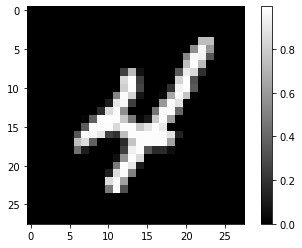

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_set[0][9].reshape(28,28)

plt.imshow(digit,cmap='gray')
plt.colorbar()
plt.show()

In [21]:
print(train_X.shape)

(50000, 784)


In [48]:
nn = NeuralNetwork()
nn.add_layer(Dense(784, 200, 'relu'))
nn.add_layer(Dense(200, 100, 'relu'))
nn.add_layer(Dense(100, 10, ))

epochs = 25
batch_size = 32
learning_rate = 0.1
reg = 1e-3
print_n = 25*len(train_X)//32//10
train_batch(nn,train_X,train_y,cross_entropy_grad_loss,epochs,batch_size,learning_rate,reg,print_n)

#nn.train_batch(train_X,train_y,ds.data_iter,loss_gradient_softmax_crossentropy,25,0.1,32,True,1e-3,2)
print(np.mean(nn.predict(train_X)==train_y))
print(np.mean(nn.predict(valid_X)==valid_y))
print(nn.predict(valid_X[9]),valid_y[9])

iteration 0: loss 2.320527
iteration 3906: loss 0.436557
iteration 7812: loss 0.363573
iteration 11718: loss 0.289885
iteration 15624: loss 0.177679
iteration 19530: loss 0.286339
iteration 23436: loss 0.189970
iteration 27342: loss 0.143797
iteration 31248: loss 0.158769
iteration 35154: loss 0.153224
0.98474
0.9766
[4] 4


### 4.3.7 改进的通用神经网络框架：分离加权和与激活函数

Layer类添加了以成员变量params保存模型的参数，用于保存模型的参数，并且添加了一个方法reg_loss_grad用来给模型参数的梯度增加损失函数中的正则项的梯度。

Dense类仅仅进行加权和计算，其构造函数接受一个对权值参数随机初始化的参数，根据不同的随机初始化方法对权值参数初始化。Dense类接受的单个数据特征不仅仅是一个向量，还可以是多通道的二维图像，如彩色图像包含红绿蓝三种颜色的图像，每个颜色通道是一个二维数组，因此forward()和backwrd()方法都会用下列代码先将多通道的输入数据摊平为一个一维向量。

In [ ]:
x1 = x.reshape(x.shape[0],np.prod(x.shape[1:]))  #将多通道的x摊平

In [49]:
class Layer:
    def __init__(self):
        self.params = None
        pass
    def forward(self, x):       
        raise NotImplementedError
    def backward(self, x, grad):        
        raise NotImplementedError
    def reg_grad(self,reg):
        pass
    def reg_loss(self,reg):
        return 0.  
    
#----------加权和计算------------    
class Dense(Layer): 
    # Z = XW+b
    def __init__(self, input_dim, out_dim,init_method = ('random',0.01)):  
        super().__init__()
        random_method_name,random_value = init_method      
        if random_method_name == "random":
            self.W = np.random.randn(input_dim, out_dim) * random_value  #0.01 * np.random.randn
            self.b = np.random.randn(1,out_dim)* random_value  
        elif random_method_name == "he":
            self.W = np.random.randn(input_dim, out_dim)*np.sqrt(2/input_dim)
            #self.b = np.random.randn(1,out_dim)* random_value
            self.b = np.zeros((1,out_dim))
        elif random_method_name == "xavier":
            self.W = np.random.randn(input_dim, out_dim)*np.sqrt(1/input_dim)
            self.b = np.random.randn(1,out_dim)* random_value  
        elif random_method_name == "zeros":
            self.W = np.zeros((input_dim, out_dim))
            self.b = np.zeros((1,out_dim))   
        else:            
            self.W = np.random.randn(input_dim, out_dim)* random_value
            self.b = np.zeros((1,out_dim))  
            
        self.params = [self.W,self.b]
        self.grads = [np.zeros_like(self.W),np.zeros_like(self.b)]
      #  self.activation = activation
      #  self.A = None
        
    def forward(self, x): 
        self.x = x        
        x1 = x.reshape(x.shape[0],np.prod(x.shape[1:]))  #将多通道的x摊平      
        Z = np.matmul(x1, self.W) + self.b        
        return Z
    
    def backward(self, dZ):
        # 反向传播      
        x = self.x
        x1 = x.reshape(x.shape[0],np.prod(x.shape[1:]))  #将多通道的x摊平
        dW = np.dot(x1.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)          
        dx = np.dot(dZ, np.transpose(self.W)) 
        dx = dx.reshape(x.shape)    #反摊平为多通道的x的形状   
        
        #self.grads = [dW, db]
        self.grads[0] += dW
        self.grads[1] += db
       
        return dx
    
    #--------添加正则项的梯度-----
    def reg_grad(self,reg):
        self.grads[0]+= 2*reg * self.W
        
    def reg_loss(self,reg):
        return  reg*np.sum(self.W**2)
    
    def reg_loss_grad(self,reg):
        self.grads[0]+= 2*reg * self.W
        return  reg*np.sum(self.W**2)

假如x是6个样本，每个样本是3个通道而每个通道是```4*4```的图像，下面代码是这3个样本作为输入的正向计算：

In [50]:
import numpy as np
np.random.seed(1)
x = np.random.randn(3,3,4, 4)  #3个样本，3个通道，每个通道是4x4图像
dense = Dense(3*4*4,10,('no',0.01))
o = dense.forward(x)
print(o.shape)
print(o)

(3, 10)
[[-0.03953509 -0.00214997  0.00743433 -0.16926214 -0.05162853  0.06734225
  -0.00221485 -0.11710758 -0.07046456  0.02609659]
 [ 0.00848392  0.08259757 -0.09858177  0.0374092  -0.08303008  0.04151241
  -0.01407859 -0.02415486  0.04236149  0.0648261 ]
 [-0.13877363 -0.04122276 -0.00984716 -0.03461381  0.11513754  0.1043094
   0.00170353 -0.00449278 -0.0057236  -0.01403174]]


梯度验证

In [51]:
do = np.random.randn(3, 10)
dx = dense.backward(do)
dx_num = numerical_gradient_from_df(lambda :dense.forward(x),x,do)

diff_error = lambda x, y: np.max(np.abs(x - y)/(np.maximum(1e-8, np.abs(x) + np.abs(y) )) )
print(diff_error(dx,dx_num))

dW_num = numerical_gradient_from_df(lambda :dense.forward(x),dense.params[0],do)
print(diff_error(dense.grads[0],dW_num))
print(dense.grads[0][:3])
print(dW_num[:3])

3.638244314951079e-09
1.3450414982951384e-11
[[ 1.77463167  0.11663492  1.87794917  0.27986781  1.27243915 -2.44375556
  -2.1266117   0.99629747 -0.73720237 -0.68570287]
 [-0.69807196  0.22547472 -0.93721649  0.3286185  -1.0421723   0.66487528
   1.33111205  0.25677848 -0.58451408  0.71015412]
 [ 0.12251147 -0.4041516   0.57764614  0.89962639 -0.35195022  0.77829011
  -0.01618803 -0.62209694 -1.28543176 -0.37554316]]
[[ 1.77463167  0.11663492  1.87794917  0.27986781  1.27243915 -2.44375556
  -2.1266117   0.99629747 -0.73720237 -0.68570287]
 [-0.69807196  0.22547472 -0.93721649  0.3286185  -1.0421723   0.66487528
   1.33111205  0.25677848 -0.58451408  0.71015412]
 [ 0.12251147 -0.4041516   0.57764614  0.89962639 -0.35195022  0.77829011
  -0.01618803 -0.62209694 -1.28543176 -0.37554316]]


还可以给Dense层后面接一个损失函数，比较损失函数关于Dense模型参数的分析梯度和数值梯度：

In [52]:
import util
x = np.random.randn(3,3,4, 4)
y = np.random.randn(3,10) 

dense = Dense(3*4*4,10,('no',0.01))

f = dense.forward(x)
loss,do = mse_loss_grad(f,y)
dx = dense.backward(do)
def loss_f():
    f = dense.forward(x)
    loss= mse_loss(f,y)
    return loss
    
dW_num = util.numerical_gradient(loss_f,dense.params[0],1e-6)
print(diff_error(dense.grads[0],dW_num))
print(dense.grads[0][:2])
print(dW_num[:2])

2.0148860313259954e-07
[[ 0.47568681 -0.06324119 -0.29294422 -0.76304343 -0.09660146  0.62794569
   1.16087896  0.06261028 -0.6611078  -0.02940735]
 [-0.10777785 -1.47174583  0.63258553  1.22381944 -0.35702633  0.4409597
  -2.42444873 -0.28804741 -1.33377026  0.66775208]]
[array([ 0.47568681, -0.06324119, -0.29294422, -0.76304343, -0.09660146,
        0.62794569,  1.16087896,  0.06261028, -0.6611078 , -0.02940735]), array([-0.10777785, -1.47174583,  0.63258553,  1.22381944, -0.35702633,
        0.4409597 , -2.42444873, -0.28804741, -1.33377026,  0.66775208])]


Dense层只计算加权和，而不需要在其中根据激活函数不同计算激活函数的值或求激活函数的导数，变得很简单。不同的激活函数可以单独实现为一个激活函数层类，下面代码定义了神经网络中最长使用的激活函数对应的激活函数层：

In [53]:
class Relu(Layer):
    def __init__(self):
        super().__init__()
        pass
    def forward(self, x):
        self.x = x  
        return np.maximum(0, x)
    def backward(self, grad_output):
        # 如果x>0，导数为1,否则0
        x = self.x
        relu_grad = x > 0
        return grad_output * relu_grad 
    
class Sigmoid(Layer):
    def __init__(self):
        super().__init__()
        pass
    def forward(self, x):
        self.x = x  
        return 1.0/(1.0 + np.exp(-x))     
    def backward(self, grad_output): 
        x = self.x  
        a  = 1.0/(1.0 + np.exp(-x))         
        return grad_output * a*(1-a) 
    
class Tanh(Layer):
    def __init__(self):
        super().__init__()
        pass
    def forward(self, x):
        self.x = x  
        self.a = np.tanh(x)  
        return self.a    
    def backward(self, grad_output):           
        d = (1-np.square(self.a))           
        return grad_output * d
    
class Leaky_relu(Layer):
    def __init__(self,leaky_slope):
        super().__init__()
        self.leaky_slope = leaky_slope        
    def forward(self, x):
        self.x = x  
        return np.maximum(self.leaky_slope*x,x)            
    def backward(self, grad_output): 
        x = self.x    
        d=np.zeros_like(x)
        d[x<=0]=self.leaky_slope
        d[x>0]=1       
        return grad_output * d

激活层没有模型参数，只是将输入x经过变换产生一个输出。输入和输出张量的形状是一样的。同样，可以用数值梯度检查激活曾的分析梯度是否正确。下面代码用模拟的损失函数关于激活层输出的梯度do，检查了上面每个激活层的分析梯度和数值梯度的误差：

In [54]:
import numpy as np
np.random.seed(1)
x = np.random.randn(3,3,4, 4)
do = np.random.randn(3,3,4, 4)

relu = Relu()
relu.forward(x)
dx = relu.backward(do)
dx_num = numerical_gradient_from_df(lambda :relu.forward(x),x,do)
print(diff_error(dx,dx_num))

leaky_relu = Leaky_relu(0.1)
leaky_relu.forward(x)
dx = leaky_relu.backward(do)
dx_num = numerical_gradient_from_df(lambda :leaky_relu.forward(x),x,do)
print(diff_error(dx,dx_num))

tanh = Tanh()
tanh.forward(x)
dx = tanh.backward(do)
dx_num = numerical_gradient_from_df(lambda :tanh.forward(x),x,do)
print(diff_error(dx,dx_num))

sigmoid = Sigmoid()
sigmoid.forward(x)
dx = sigmoid.backward(do)
dx_num = numerical_gradient_from_df(lambda :sigmoid.forward(x),x,do)
print(diff_error(dx,dx_num))

3.2756345281587516e-12
7.43892997215858e-12
5.170019175240593e-11
3.282573028416693e-11


从这些激活层的分梯度和数值梯度误差几乎相等，可以基本确信分析梯度代码的正确性。

在dense层和各个激活层的基础上，可以定义一个表示神经网络的类NeuralNetwork:

In [55]:
class NeuralNetwork:  
    def __init__(self):
        self._layers = []
        self._params = []
 
    def add_layer(self, layer):      
        self._layers.append(layer)
        if layer.params: 
           # for  i in range(len(layer.params)): 
            for  i, _ in enumerate(layer.params):                         
                self._params.append([layer.params[i],layer.grads[i]])            
    
    def forward(self, X): 
        for layer in self._layers:
            X = layer.forward(X) 
        return X   

    def __call__(self, X):
        return self.forward(X)
    
    def predict(self, X):
        """
        输入X，预测其分类
        """
        p = self.forward(X)
        # One row
        if p.ndim == 1:     #单样本
            return np.argmax(ff)        
        # 多样本
        return np.argmax(p, axis=1)
  
   
    def backward(self,loss_grad,reg = 0.):
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i] 
            loss_grad = layer.backward(loss_grad)
            layer.reg_grad(reg) 
        return loss_grad
    
    
    def backpropagation(self, X, y,loss_function,reg=0):
        """
        反向计算，loss_function函数用于计算损失函数关于输出层的梯度
        """        
        # Feed forward for the output
        f = self.forward(X)          
        #损失函数关于输出f的梯度
        loss,loss_grad = loss_function(f,y)         
      
        #从loss_grad反向求导
        self.zero_grad()
        self.backward(loss_grad)  
        reg_loss = self.reg_loss_grad(reg)       
        return loss+reg_loss
        #return np.mean(loss)
    
    def reg_loss(self,reg):
        reg_loss = 0
        for i in range(len(self._layers)):
            reg_loss+=self._layers[i].reg_loss(reg)
        return reg_loss
    
    def parameters(self): 
        return self._params
    
    def zero_grad(self):
        for i,_ in enumerate(self._params):           
            #self.params[i][1].fill(0.) 
            self._params[i][1][:] = 0 
            
    def get_parameters(self):
        return self._params 

为了确保forward()和backward()方法的正确性，可以用数值梯度的方法检验它们的正确性。下面代码定义了一个简单的神经网络，并用一组随机生成的样本(x,y)来计算比较backward()计算的分析梯度和用1.4节的通用数值梯度函数求得的数值梯度，看看它们的计算结果是否一致。

In [56]:
import util

np.random.seed(1)
nn = NeuralNetwork()
nn.add_layer(Dense(2, 100,('no',0.01)))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 3,('no',0.01)))

x = np.random.randn(5,2)
y = np.random.randint(3, size=5)

f = nn.forward(x)
dZ = cross_entropy_grad(f,y)  #util.grad_softmax_cross_entropy(f,y) #
nn.zero_grad()                            #梯度清零
reg = 0.1
dx =  nn.backward(dZ,reg)

#-----计算数值梯度-----------
params = nn.parameters()
nn_params=[]
for i in range(len(params) ):    
    nn_params.append(params[i][0]) 
    
def loss_fn():
    f = nn.forward(x)
    loss =  softmax_cross_entropy(f,y) #util.softmax_cross_entropy(f,y) # 
    return loss+nn.reg_loss(reg)

numerical_grads = util.numerical_gradient(loss_fn,nn_params,1e-6)
for i in range(len(numerical_grads)):
    print(diff_error(params[i][1],numerical_grads[i]))

1.892395698905401e-06
1.7651393552515298e-06
2.306498772862026e-06
2.3545204992835373e-10


In [57]:
import util

np.random.seed(1)
nn = NeuralNetwork()
nn.add_layer(Dense(2, 100,('no',0.01)))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 3,('no',0.01)))

x = np.random.randn(5,2)
y = np.random.randint(3, size=5)

f = nn.forward(x)
dZ = cross_entropy_grad(f,y)  #util.grad_softmax_cross_entropy(f,y) #
nn.zero_grad()                            #梯度清零
reg = 0.1
dx =  nn.backward(dZ,reg)

#-----计算数值梯度-----------
params = nn.parameters()
nn_params=[]
for i in range(len(params) ):    
    nn_params.append(params[i][0]) 
    
def loss_fn():
    f = nn.forward(x)
    loss =  softmax_cross_entropy(f,y) #util.softmax_cross_entropy(f,y) # 
    return loss+nn.reg_loss(reg)

numerical_grads = util.numerical_gradient(loss_fn,nn_params,1e-6)
for i in range(len(numerical_grads)):
    print(diff_error(params[i][1],numerical_grads[i]))

1.892395698905401e-06
1.7651393552515298e-06
2.306498772862026e-06
2.3545204992835373e-10


可见数值梯度和分析梯度非常接近，初步确定模型的forward()和backward()没什么问题。

### 4.3.8 独立的参数优化器

为了方便用不同的梯度下降优化策略更新模型参数，可以将它们编写为一个单独的类，如：

In [59]:
class SGD():
    def __init__(self,model_params,learning_rate=0.01, momentum=0.9):
        self.params,self.lr,self.momentum = model_params,learning_rate,momentum
        self.vs = []
        for p,grad in self.params:
            v = np.zeros_like(p)
            self.vs.append(v)
        
    def zero_grad(self):        
        #for p,grad in params:
        for i,_ in enumerate(self.params):           
            #self.params[i][1][:] = 0.          
            self.params[i][1].fill(0) 
                
    def step(self):           
        for i,_ in enumerate(self.params):     
            p,grad = self.params[i]           
            self.vs[i] = self.momentum*self.vs[i]+self.lr* grad             
            self.params[i][0] -= self.vs[i] 
            #self.params[i][0][:] =  self.params[i][0] - self.vs[i] 
      
    def scale_learning_rate(self,scale):
        self.lr *= scale

In [60]:
learning_rate = 1e-1
momentum = 0.9
optimizer = SGD(nn.parameters(),learning_rate,momentum)

同样，也可以定义其他的优化器类，如下面的Adam优化器：

In [61]:
class Adam():
    def __init__(self,model_params,learning_rate=0.01, beta_1 = 0.9,beta_2 = 0.999,epsilon =1e-8):
        self.params,self.lr = model_params,learning_rate
        self.beta_1,self.beta_2,self.epsilon = beta_1,beta_2,epsilon
        self.ms = []
        self.vs = []
        self.t = 0
        for p,grad in self.params:
            m = np.zeros_like(p)
            v = np.zeros_like(p)
            self.ms.append(m)
            self.vs.append(v)
        
    def zero_grad(self):        
        #for p,grad in params:        
        for i,_ in enumerate(self.params):
            #self.params[i][1][:] = 0.          
            self.params[i][1].fill(0) 
                
    def step(self):   
        #for  i in range(len(self.params)): 
        beta_1,beta_2,lr = self.beta_1,self.beta_2,self.lr
        self.t+=1
        t = self.t
        for i,_ in enumerate(self.params):     
            p,grad = self.params[i]       
            
            self.ms[i] = beta_1*self.ms[i]+(1-beta_1)*grad
            self.vs[i] = beta_2*self.vs[i]+(1-beta_2)*grad**2 
            
            m_1 = self.ms[i]/(1-np.power(beta_1, t))
            v_1 = self.vs[i]/(1-np.power(beta_2, t))  
            self.params[i][0]-= lr*m_1/(np.sqrt(v_1)+self.epsilon)
      
    def scale_learning_rate(self,scale):
        self.lr *= scale

下面的训练函数train()接受一个数据迭代器，每次从中取出一批训练样本（input, target），对每批样本，先执行forwrd()计算输出output，然后用损失函数计算其损失loss和损失函数关于输出output的梯度loss_grad，将这个梯度loss_grad通过backward()函数反向回传，求得模型参数和中间变量的梯度。随后用optimizer的step()函数更新模型参数。

In [62]:
def data_iterator(X,y,batch_size,shuffle=False):
    m = len(X)  
    indices = list(range(m))
    if shuffle:                 # shuffle是True表示打乱次序
        np.random.shuffle(indices)
    for i in range(0, m - batch_size + 1, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, m)])      
        yield X.take(batch_indices,axis=0), y.take(batch_indices,axis=0)

In [63]:
def train_nn(nn,X,y,optimizer,loss_fn,epochs=100,batch_size = 50,reg = 1e-3,print_n=10):
    iter = 0
    losses = [] 
    for epoch in range(epochs):
        for X_batch,y_bacth in data_iter(X,y,batch_size):     
            optimizer.zero_grad()      
            
            f = nn(X_batch) # nn.forward(X_batch)      
            loss,loss_grad = loss_fn(f, y_bacth)       
            nn.backward(loss_grad,reg)               
            loss += nn.reg_loss(reg)
          
            optimizer.step()

            losses.append(loss)
            
            if iter%print_n==0:
                print(iter,"iter:",loss)
            iter +=1          

    return losses

现在可以用这个神经网络去训练前面的3分类的问题

0 iter: 1.0985916677722303
480 iter: 0.7056240023920841
960 iter: 0.6422407772314334
1440 iter: 0.5246104670488081
1920 iter: 0.4186441561530432
2400 iter: 0.37118840941018727
2880 iter: 0.34583485668931857
3360 iter: 0.32954842747580104
3840 iter: 0.31961537369884196
4320 iter: 0.3124394704919282
4800 iter: 0.30620107113884415


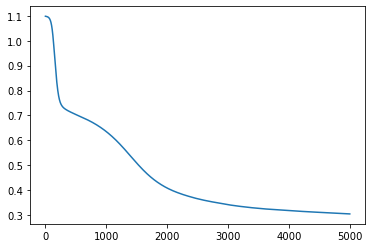

In [65]:

import data_set as ds
import util

np.random.seed(1)
nn = NeuralNetwork()
nn.add_layer(Dense(2, 100,('no',0.01)))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 3,('no',0.01)))

X,y = ds.gen_spiral_dataset()
epochs=5000
batch_size = len(X)
reg = 0.5e-3
print_n=480

learning_rate = 1e-1
momentum = 0.5#
optimizer = SGD(nn.parameters(),learning_rate,momentum)

losses = train_nn(nn,X,y,optimizer,cross_entropy_grad_loss,epochs,batch_size,reg,print_n)

import matplotlib.pylab as plt
%matplotlib inline
plt.plot(losses)

### 4.3.9 fashion-mnist的分类训练

In [66]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
print(X_train.shape,y_train.shape)
print(X_train.dtype,y_train.dtype)

(60000, 784) (60000,)
uint8 uint8


(60000, 28, 28)


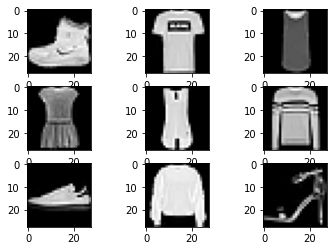

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
trainX = X_train.reshape(-1,28,28)
print(trainX.shape)
#lot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [68]:
train_X = trainX.astype('float32')/255.0
print(np.mean(trainX),np.mean(train_X))

72.94035223214286 0.2860402


定义训练的神经网络模型

In [102]:
import numpy as np
import util
##from NeuralNetwork import *
##from train import *
np.random.seed(1)

nn = NeuralNetwork()
nn.add_layer(Dense(784, 500))
nn.add_layer(Relu())
nn.add_layer(Dense(500, 200))
nn.add_layer(Relu())
nn.add_layer(Dense(200, 100))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 10))
#nn.add_layer(Tanh())

定义优化器对象

In [103]:
learning_rate = 0.01
momentum = 0.9
optimizer = SGD(nn.parameters(),learning_rate,momentum)

0 iter: 2.3016755298047347
1000 iter: 1.1510374540057933
2000 iter: 0.47471113470221005
3000 iter: 0.5333139450988945
4000 iter: 0.259167391843765
5000 iter: 0.3629363583454308
6000 iter: 0.3486191552507917
7000 iter: 0.4914253677369693


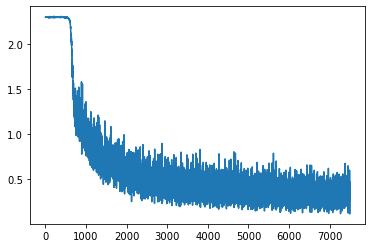

In [104]:
epochs=8
batch_size = 64
reg = 0#1e-3
print_n=1000

losses = train_nn(nn,train_X,y_train,optimizer,cross_entropy_grad_loss,epochs,batch_size,reg,print_n)

plt.plot(losses)

In [105]:
print(np.mean(nn.predict(train_X)==y_train))
test_X = X_test.reshape(-1,28,28).astype('float32')/255.0
print(np.mean(nn.predict(test_X)==y_test))

0.87965
0.8585


### 4.3. 9 读写模型参数

In [56]:
class NeuralNetwork:  
    def __init__(self):
        self._layers = []
        self._params = []
 
    def add_layer(self, layer):      
        self._layers.append(layer)
        if layer.params: 
           # for  i in range(len(layer.params)): 
            for  i, _ in enumerate(layer.params):                         
                self._params.append([layer.params[i],layer.grads[i]])            
    
    def forward(self, X): 
        for layer in self._layers:
            X = layer.forward(X) 
        return X   

    def __call__(self, X):
        return self.forward(X)
    
    def predict(self, X):
        """
        输入X，预测其分类
        """
        p = self.forward(X)
        # One row
        if p.ndim == 1:     #单样本
            return np.argmax(ff)        
        # 多样本
        return np.argmax(p, axis=1)
  
   
    def backward(self,loss_grad,reg = 0.):
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i] 
            loss_grad = layer.backward(loss_grad)
            layer.reg_grad(reg) 
        return loss_grad
    
    
    def backpropagation(self, X, y,loss_function,reg=0):
        """
        反向计算，loss_function函数用于计算损失函数关于输出层的梯度
        """        
        # Feed forward for the output
        f = self.forward(X)          
        #损失函数关于输出f的梯度
        loss,loss_grad = loss_function(f,y)         
      
        #从loss_grad反向求导
        self.zero_grad()
        self.backward(loss_grad)  
        reg_loss = self.reg_loss_grad(reg)       
        return loss+reg_loss
        #return np.mean(loss)
    
    def reg_loss(self,reg):
        reg_loss = 0
        for i in range(len(self._layers)):
            reg_loss+=self._layers[i].reg_loss(reg)
        return reg_loss
    
    def parameters(self): 
        return self._params
    
    def zero_grad(self):
        for i,_ in enumerate(self._params):           
            #self.params[i][1].fill(0.) 
            self.params[i][1][:] = 0 
            
    def get_parameters(self):
        return self._params 
    
    
    def save_parameters(self,filename):
        params = {}
        for i in range(len(self._layers)):
            if self._layers[i].params:
                params[i] = self._layers[i].params
        np.save(filename, params)
                
        
    def load_parameters(self,filename):
        params = np.load(filename,allow_pickle = True)
        count = 0
        for i in range(len(self._layers)):
            if self._layers[i].params:
                layer_params = params.item().get(i)
                self._layers[i].params = layer_params                
                for j in range(len(layer_params)):                   
                    self._params[count][0] = layer_params[j]
                    count+=1  

In [57]:
#from NeuralNetwork import *
nn = NeuralNetwork()
nn.add_layer(Dense(3, 2,('xavier',0.01)))
nn.add_layer(Relu())
nn.add_layer(Dense(2, 4,('xavier',0.01)))
nn.add_layer(Relu())

def print_nn_parameters(params,print_grad=False): 
    for p,grad in params:  
        print("p",p)
        if print_grad:
            print("grad",grad)
        print()    
print_nn_parameters(nn.get_parameters())
nn.save_parameters('model_params.npy')
nn.load_parameters('model_params.npy')
print_nn_parameters(nn.get_parameters())

p [[-1.1933103  -0.34171091]
 [-0.08202091  0.07448119]
 [ 0.71977306 -0.08260996]]

p [[ 0.00687304 -0.0052508 ]]

p [[ 1.25016925 -0.27714009 -0.27932718 -1.07294965]
 [-0.98489125 -0.23448778  0.31553585 -0.80151211]]

p [[-0.00451004  0.01688496  0.01032032 -0.01244033]]

p [[-1.1933103  -0.34171091]
 [-0.08202091  0.07448119]
 [ 0.71977306 -0.08260996]]

p [[ 0.00687304 -0.0052508 ]]

p [[ 1.25016925 -0.27714009 -0.27932718 -1.07294965]
 [-0.98489125 -0.23448778  0.31553585 -0.80151211]]

p [[-0.00451004  0.01688496  0.01032032 -0.01244033]]

